<a href="https://colab.research.google.com/github/Rickhersd/Game_market_data_analist/blob/main/Analist_game_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis del Mercado de Videojuegos para el año 2020**

El proyecto que se presenta a continuación es uno de los tres proyectos integradores propuestos durante el bootcamp SoyHenry, específicamente para el módulo de Análisis de Datos.

En este ejercicio, se proporcionan cuatro conjuntos de datos: tres relacionados con el mercado global de videojuegos y uno relacionado con el Índice de Desarrollo Humano del Banco Mundial. El objetivo de esta tarea es combinar la información de los cuatro conjuntos de datos para describir el panorama actual del mercado de videojuegos, identificando nichos y tendencias que puedan ayudar en el lanzamiento de nuevos productos y así determinar las tendencias en el mercado.

Es importante tener en cuenta que este proyecto se limita a información recopilada hasta el año 2020, por lo que no refleja el panorama actual del mercado. Además del análisis, el objetivo principal es demostrar conocimiento en el uso de las librerías comos Pandas, para el manejo de los datos proporcionados, y Matplotlib y Seaborn para la visualización de gráficos.

## **Enunciado Original**

Analizar el mercado de videojuegos, con el objetivo de identificar posibles nichos, en donde se pueden desarrollar nuevos productos. Encontrar los insights y presentarlos, suponiendo que nuestra audiencia se un grupo inversor dispuesto a invertir en el desarrollo de nuevos productos.

### **Preguntas a responder**

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### **Recursos**

Para la completar la tarea, se proveen los siguientes  recursos:
- **Indicadores_del_desarrollo_humano_mundial**: Banco Mundial Indicadores de desarrollo humano.
- **Console_sales: Reporte de ventas anuales de consolas**. por marca y modelo.
- **Juegos en steam**: Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc.
- **Video Games Sales**: Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global)


## **Carga de Datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import HTML, display, Javascript
import numpy as np

df_games = pd.read_csv('/content/drive/MyDrive/datasets/steam_games.csv')
df_sales = pd.read_csv('/content/drive/MyDrive/datasets/games_sales.csv')
df_consoles = pd.read_excel('/content/drive/MyDrive/datasets/console_sales.xlsx')
df_HDI = pd.read_excel('/content/drive/MyDrive/datasets/human_developing_world_banks.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **EDA: El Índice de Desarrollo Humano**

El desaset sobre el Índice de Desarrollo Humano (IDH) contiene una extracion de datos dle Indice de Desarrollo Humano(IDH ) es un indicador creado por el Programa de las Naciones Unidas para el Desarrollo (PNUD) que, desde hace tres décadas, da a conocer el grado de progreso de cada país.

En este caso, el detaset cotiene informacion respecto a 58 indicadores, y por cada indicador, hay cuarto filas, cada una reflejando informacion en una determianda region: Estados unidos, Japón, Union Europea y Mundo en general.

El Detaset posee un total de

In [ ]:
print('columnas: ', df_HDI.shape[0])
print('filas: ', df_HDI.shape[1])

columnas:  237
filas:  24


Y por cada registro se describe lo siguiente:

- Series Name: Nombre de la Serie.
- Series Code: Codigo de la Serie.
- Country Name: Nombre del Pais o Región a los cuales pertencen los datos.
- Country Code: Codigo del Pais o Region.
  2000 [YR2000] - 2019 [YR2019]: 19 Columnas con los datos obtenidos para dicho año. Una columna por cada año desde el 2000.

### Ejemplo de los datos

|index|Series Name|Series Code|Country Name|Country Code|2000 \[YR2000\]| ... |2019 \[YR2019\] |
|---|---|---|---|---|---|---|---|
|0|Superficie \(kilómetros cuadrados\)|AG\.SRF\.TOTL\.K2|Estados Unidos|USA|9632030|---|
|1|Superficie \(kilómetros cuadrados\)|AG\.SRF\.TOTL\.K2|Unión Europea|EUU|4384964\.9951171875|---|
|2|Superficie \(kilómetros cuadrados\)|AG\.SRF\.TOTL\.K2|Japón|JPN|377800|---|

### **Selección**

Del conjunto de datos, se consideraron relevantes todos los indicadores que representan la riqueza de un país, como el PIB, así como el indicador de la población total comprendida entre 15 y 65 años de edad, incluyendo tanto a hombres como a mujeres.

In [ ]:
index_to_use = [
  'NY.GDP.MKTP.CD', ## PIB (US$ a precios actuales)
  'SP.POP.1564.TO', ## Población entre 15 y 64 años de edad, total
]

df_HDI = df_HDI[df_HDI['Series Code'].isin(index_to_use)]

## **Limpieza**

Se procedió a renombrar las columnas correspondientes a los años utilizando nombres más breves.

In [ ]:
prev_years = list(df_HDI.loc[:,'2000 [YR2000]':'2018 [YR2018]'].columns)

for year in prev_years:
  df_HDI = df_HDI.rename(columns={year: year[0:4]})

Se eliminó la columna correspondiente al año 2019, ya que carecía de información disponible en el conjunto de datos. Además, se eliminó la columna "Country Name", ya que era un identificador innecesario para el análisis.

In [ ]:
columns_to_drop = [
  'Country Name',
  '2019 [YR2019]'
]

try: df_HDI = df_HDI.drop(columns_to_drop, axis=1)
except: pass

Resultado final:

In [ ]:
df_HDI.isna().sum()

Series Name     0
Series Code     0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
dtype: int64

## EDA: Juegos de Steam

El dataset Steam_games proporciona información sobre el mercado de videojuegos en la plataforma de ventas Steam. Esta plataforma es la más importante de ventas de videojuegos de PC, por lo que toda la información provista está relacionada con el mercado de videojuegos para esta plataforma.

El Detaset posee un total de

In [ ]:
print('columnas: ', df_HDI.shape[0])
print('filas: ', df_HDI.shape[1])

columnas:  8
filas:  22


y cada registro proporciona la siguiente información:

- appid: ID del título en el conjunto de datos.
- name: Nombre del videojuego.
- release_date: Fecha de lanzamiento.
- publisher: Distribuidora.
- english: Indica si el título está disponible en inglés. 1 si es sí, 0 si no.
- categories: Categorías a las que pertenece el videojuego.
- genres: Género del videojuego.
- steamspy_tags: Etiquetas de Steam.
- achievements: Número de logros que tiene el juego.
- positive_ratings: Valoraciones positivas.
- negative_ratings: Valoraciones negativas.
- average_playtime: Promedio de horas totales jugadas por los usuarios.
- median_playtime: Mediana de horas totales jugadas por los usuarios.
- owners: Rango categórico de usuarios que han comprado el juego.
- price: Precio de venta.

### **Ejemplo de los datos**

|appid|name|release\_date|english|developer|publisher|platforms
|---|---|---|---|---|---|---|
|10|Counter-Strike|2000-11-01|1|Valve|Valve|windows;mac;linux|
|20|Team Fortress Classic|1999-04-01|1|Valve|Valve| windows;mac;linux
|30|Day of Defeat|2003-05-01|1|Valve|Valve|windows;mac;linux

<br />

|required\_age|categories|genres|steamspy\_tags|achievements|
|---|---|---|---|---|
|0|Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled|Action|Action;FPS;Multiplayer|0|
|0|Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled|Action|Action;FPS;Multiplayer|0|
|0|Multi-player;Valve Anti-Cheat enabled|Action|FPS;World War II;Multiplayer|0|

<br />

|positive\_ratings|negative\_ratings|average\_playtime|median\_playtime|owners|price|
|---|---|---|---|---|---|
|124534|3339|17612|317|10000000-20000000|7\.19|
|3318|633|277|62|5000000-10000000|3\.99|
|3416|398|187|34|5000000-10000000|3\.99|

### **Selección**

Del conjunto de datos, se eliminaron las siguientes columnas:

- Appid: Identificador irrelevante para el análisis.
- Name: Como el análisis va enfocado al mercado de videojuegos a nivel general, no resultó relevante.
- Achievements: La inclusión de logros en un juego no se consideró relevante para evaluar las tendencias del mercado.
- English: Se eliminó porque se asume que todos los videojuegos deberían estar disponibles en inglés al ser el idioma universal.
- Developer y Publisher: Ambas columnas describen el mismo aspecto, y este no se consideró relevante para responder a las preguntas planteadas.

Además, también se eliminaron las siguientes columnas:

- Platforms: Como se puede observar en el gráfico siguiente, prácticamente el 100% de los videojuegos están disponibles para Windows. Por lo tanto, para el lanzamiento de nuevos productos en PC, este Sistema Operativo será base.


<IPython.core.display.Javascript object>

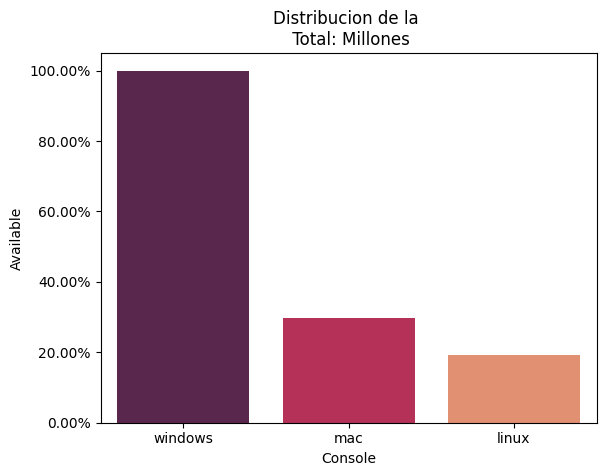

In [ ]:
platform = {'windows': 0, 'mac': 0, 'linux': 0}
all_games = df_games.shape[0]

for plats in df_games['platforms']:
  platforms_splited = plats.split(';')
  for plat in ['windows','linux','mac']:
    if plat in platforms_splited: platform[plat] = platform[plat] + 1

plt.title('Distribucion de la \n Total: ' +  'Millones')
df_platforms = pd.DataFrame(dict({
  'Console': list(platform),
  "Available": list(platform.values())
}))

df_platforms["Available"] = df_platforms["Available"] / all_games * 100
g = sns.barplot(df_platforms, y="Available", x='Console', palette="rocket")
ylabels = ['{:,.2f}'.format(x) + '%' for x in g.get_yticks()]

g.yaxis.set_major_locator(ticker.FixedLocator(g.get_yticks()))
g.set_yticklabels(ylabels)

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

- Edad Requeridad: aunque este dato se considera de interés, la siguiente tabla muestra qu la mayor parte de los títulos tiene 0 como Edad requerida y no se sabe con certeza lo que esto representa: si la edad requerida es 0 o si el videojuego no tiene clasificación por edad. Por lo tanto, la columan se eliminó.

In [ ]:
df_games.groupby('required_age')['required_age'].agg('count')

required_age
0     26479
3        11
7        12
12       73
16      192
18      308
Name: required_age, dtype: int64

Por último, se eliminaron las columnas que hacen referencia a la puntuación obtenida por la crítica y los usuarios, ya que se considera que estos factores no dependen del tipo de juego ni de las tendencias del mercado. En cambio, se entiende que la puntuación es subjetiva y se basa en los criterios individuales de quienes la otorgan.

In [ ]:
columns_to_drop = [
  'platforms',
  'name',
  'appid',
  'achievements',
  'english',
  'required_age',
  'developer',
  'negative_ratings',
  'positive_ratings'
]
try: df_games.drop(columns_to_drop, axis=1, inplace=True)
except: pass

### **Limpieza**

El detaset está completo y no hay datos faltantes:

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      27075 non-null  object 
 1   publisher         27075 non-null  object 
 2   categories        27075 non-null  object 
 3   genres            27075 non-null  object 
 4   steamspy_tags     27075 non-null  object 
 5   average_playtime  27075 non-null  int64  
 6   median_playtime   27075 non-null  int64  
 7   owners            27075 non-null  object 
 8   price             27075 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


Por otro lado, si se cambiaron los datos de tipo fecha y las variables categóricas al tipado correcto.

In [ ]:
df_games['release_date'] = pd.DatetimeIndex(pd.to_datetime(df_games['release_date'])).year
df_games['genres'] = df_games['genres'].astype("category")
df_games['owners'] = df_games['owners'].astype("category")

## **EDA: Venta de Juegos**

Este dataset, games_sales, incluye información sobre los videojuegos y las ventas de estos en el mercado actual.

El conjunto de datos está compuesto por:


In [ ]:
print('columnas: ', df_sales.shape[0])
print('filas: ', df_sales.shape[1])

columnas:  16719
filas:  16


, y cada registro describe lo siguiente:

- Name: Nombre del videojuego.
- Platform: Plataforma en la cual se publicó el videojuego, que incluye desde portátiles hasta consolas de sobremesa y PC.
- Year_of_Release: Año de lanzamiento.
- Genre: Género del videojuego.
- Publisher: Distribuidora.
- NA_Sales: Ventas en América del Norte (NA).
- EU_Sales: Ventas en la Unión Europea (EU).
- JP_Sales: Ventas en Japón.
- Other_Sales: Ventas en el resto del mundo.
- Global_Sales: Ventas globales.
- Critic_Score: Puntuación promedio de la crítica.
- Critic_Count: Cantidad de críticos que han dado puntuación.
- User_Score: Puntuación promedio de los usuarios.
- User_Count: Cantidad de usuarios que han votado.
- Developer: Desarrolladora del videojuego.
.Rating: Clasificación por edad del videojuego. El rating provisto se basa en el sistema de clasificación estadounidense de contenido de videojuegos ESRB (Entertainment Software Rating Board).

### **Ejemplo de datos**

|index|Name|Platform|Year\_of\_Release|Genre|Publisher|NA\_Sales|EU\_Sales|JP\_Sales|Other\_Sales|Global\_Sales|
|---|---|---|---|---|---|---|---|---|---|---|
|0|Wii Sports|Wii|2006\.0|Sports|Nintendo|41\.36|28\.96|3\.77|NaN|82\.53|
|1|Super Mario Bros\.|NES|1985\.0|Platform|Nintendo|29\.08|3\.58|6\.81|0\.77|40\.24|
|2|Mario Kart Wii|Wii|2008\.0|Racing|Nintendo|15\.68|12\.76|3\.79|3\.29|35\.52|
|3|Wii Sports Resort|Wii|2009\.0|Sports|Nintendo|15\.61|10\.93|3\.28|NaN|32\.77|
|4|Pokemon Red/Pokemon Blue|GB|1996\.0|Role-Playing|Nintendo|11\.27|8\.89|10\.22|1\.0|31\.37|

<br />

|Critic\_Score|Critic\_Count|User\_Score|User\_Count|Developer|Rating|
|---|---|---|---|---|---|
|76\.0|51\.0|8|322\.0|Nintendo|E|
|NaN|NaN|NaN|NaN|NaN|NaN|
|82\.0|73\.0|8\.3|709\.0|Nintendo|E|
|80\.0|73\.0|8|192\.0|Nintendo|E|
|NaN|NaN|NaN|NaN|NaN|NaN|

### **Selección**

Del conjunto de datos se eliminaron las siguientes columnas:

- Name: Se consideró irrelevante, ya que el objetivo es describir el mercado a un nivel general y no enfocarse en títulos específicos.
- Developer y Publisher: Ambas columnas describen el mismo aspecto, y este no se consideró relevante para responder a las preguntas planteadas.

Además, en el conjunto de datos de juegos de Steam, también se eliminaron las columnas que hacen referencia a la puntuación obtenida por la crítica y los usuarios.

In [ ]:
columns_to_drop = [
  'Name',
  'Developer',
  'Publisher',
  'Critic_Score',
  'Critic_Count',
  'User_Score',
  'User_Count'
]

try: df_sales.drop(columns_to_drop, axis=1, inplace=True)
except: pass

Por último, se tomaron en cuenta sólo los videojuegos con fechas de lanzamientos mayores o iguales al año 2000.

In [ ]:
df_sales = df_sales[df_sales['Year_of_Release'] > 2000]

### **Limpieza**

Como se puede ver a continuación, el dataset de Ventas de juegos poseen datos faltantes en las mitad de sus columnas.

In [ ]:
df_sales.isna().sum().reset_index().rename({'index': 'Columna', 0: 'Datos faltantes'}, axis=1)

,Columna,Datos faltantes
0,Platform,0
1,Year_of_Release,0
2,Genre,0
3,NA_Sales,725
4,EU_Sales,1044
5,JP_Sales,0
6,Other_Sales,1170
7,Global_Sales,835
8,Rating,4608


En el caso de las ventas para América del Norte (NA_Sales), la Unión Europea (EU_Sales) y el resto del mundo (Other_Sales), se consideró que la falta de valores indica que el videojuego no ha registrado ventas lo suficientemente altas para ser registradas. Por lo tanto, en estas columnas los datos se imputaron con 0, indicando que no hay ventas.


In [ ]:
def fill_columns(columns: list, dataframe: pd.DataFrame, value) :
  for col in columns:
    dataframe[col] = dataframe[col].fillna(value)

fill_columns(['NA_Sales', 'EU_Sales', 'Other_Sales'], df_sales, 0)
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

<IPython.core.display.Javascript object>

En el caso Global_Sales, este representan la suma de Ventas de NA (Norte de América), EU (Unión Europea), JP (Japón) y other_sales (resto del mundo), por lo que los datos faltantes se imputaron con la suma de estas tres columnas.

In [ ]:
def fill_global(row):
  if np.isnan(row['Global_Sales']):
    row['Global_Sales'] = row['NA_Sales'] + row['EU_Sales'] + row['Other_Sales'] + row['JP_Sales']
  return row

df_sales = df_sales.apply(fill_global, axis=1)

La Columna "Rating" se imputó con la categoría RP (Rating Pending) de la ESBR, únicamente para dar a entender que ese videojuego no posee Rating.

In [ ]:
df_sales.Rating = df_sales.Rating.fillna('RP')

Finalmente, se trabajará con el siguiente dataset:

In [ ]:
df_sales.isna().sum().reset_index().rename({'index': 'Columna', 0: 'Datos faltantes'}, axis=1)

,Columna,Datos faltantes
0,Platform,0
1,Year_of_Release,0
2,Genre,0
3,NA_Sales,0
4,EU_Sales,0
5,JP_Sales,0
6,Other_Sales,0
7,Global_Sales,0
8,Rating,0


##  **EDA: Ventas de Consolas**


El conjunto de datos proporciona información sobre el mercado de consolas de sobremesa. Está compuesto por 85 filas y 5 columnas, y cada registro describe lo siguiente:

- Year: año en el que se realizaron las ventas.
- Dato: "Anual" si el registro representa el número de ventas anuales del producto o "Out_of_use" si el producto ya no se encuentra en venta.
- Console: nombre de la consola.
- Company: compañía propietaria del producto.
- Sales: número total de ventas realizadas. En caso de que el campo Dato sea "Out_of_use", este campo representa el total de ingresos generados a lo largo de la historia del producto, expresado de forma negativa.

Los datos proporcionados abarcan desde el año 2008 hasta 2020, lo que los hace relativamente actuales. No se descartaron datos debido a su antigüedad, y todas las columnas se consideraron relevantes para el análisis, por lo que no se eliminó ninguna.

### **Ejemplo de los datos**

In [ ]:
df_consoles.head(5)

,Year,Dato,Console,Company,Sales
0,2011,anual,Nintendo 3DS,Nintendo,12560000.0
1,2012,anual,Nintendo 3DS,Nintendo,13480000.0
2,2013,anual,Nintendo 3DS,Nintendo,14310000.0
3,2014,anual,Nintendo 3DS,Nintendo,9740000.0
4,2015,anual,Nintendo 3DS,Nintendo,7330000.0


### **Limpieza**

El dataset no presentó valores atípicos ni campos faltantes en ninguna de sus columnas.

In [ ]:
df_consoles.isna().sum().reset_index().rename({'index': 'Columna', 0: 'Datos faltantes'}, axis=1)

,Columna,Datos faltantes
0,Year,0
1,Dato,0
2,Console,0
3,Company,0
4,Sales,0


## **Análisis**

### **¿Qué análisis podemos hacer del mercado actual?**

Se puede realizar un análisis descriptivo, el cual consiste en describir las tendencias clave en los datos existentes y observar las situaciones que puedan dar lugar a nuevos hechos.

En este sentido, la idea sería recopilar los datos de los datasets disponibles y evaluar la evolución de las tendencias de las variables consideradas relevantes para el análisis, con el fin de describir cómo han evolucionado o cambiado los mercados en general. Gracias a este tipo de análisis, se pueden responder las preguntas propuestas y otras interrogantes, tales como:

¿Cuáles son los géneros de videojuegos más vendidos en la actualidad?
¿Qué características influyen en el volumen de ventas de un videojuego a lo largo del tiempo?
¿Cuáles son las plataformas más populares?
Entre otras...

Además, se pueden relacionar los datos obtenidos en las respuestas con los datos proporcionados por el Índice de Desarrollo Humano para determinar en qué regiones es más conveniente lanzar y promocionar nuevos títulos.

### **¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?**

Según el analista, al determinar el primer videojuego de una empresa, se deben tener en cuenta los siguientes aspectos:

- En primer lugar, se debe considerar la plataforma en la cual se lanzará el nuevo título, dando preferencia a aquellas que han tenido un mayor número de ventas en los últimos años, ya que esto se traduciría en una mayor cantidad de usuarios.

- En segundo lugar, es importante identificar las regiones que tienen un mayor consumo de videojuegos y enfocar el análisis de acuerdo a los datos de esas regiones seleccionadas.

- En tercer lugar, se debe definir el tipo de contenido más adecuado para obtener el máximo retorno de inversión. Es necesario evaluar si es conveniente dirigirse a un público más joven, como niños o adolescentes, o si es más beneficioso incluir contenido destinado a mayores de 17 años, es decir, clasificación "M".

- En cuarto lugar, es importante determinar las tendencias en cuanto a los géneros de videojuegos más populares, aquellos que generan mayores ingresos y los que atraen a un mayor número de usuarios.

- Por último, teniendo en cuenta el género seleccionado, es necesario realizar un análisis de las características más comunes que incluyen los juegos de ese género. Para ello, sería adecuado utilizar las etiquetas de clasificación de las plataformas de venta y determinar las etiquetas más comunes asociadas a esos juegos en el mercado, como "FPS" (disparos en primera persona), "Multijugador", "Mundo abierto", entre otras. De esta manera, se pueden definir las características que deberá tener el producto final.

### **¿Qué diferencias encontramos entre las distintas plataformas?**

En el mercado de consumo de videojuegos, se pueden identificar dos principales categorías de plataformas: las consolas, tanto portátiles como de sobremesa, y los PC.

En esta sección del análisis, nos centraremos principalmente en el mercado de las consolas, ya que en el caso de los PC no existe un mercado propiamente dicho, sino que depende de la potencia de cada ordenador para utilizarlo como plataforma de juegos.

En este sentido, a lo largo de las últimas dos décadas, tres compañías han liderado el mercado de consolas: Nintendo, Sony y Microsoft. y a continuación, se presenta una tabla que muestra las consolas lanzadas al mercado desde el año 2008 por esta, junto con el año de lanzamiento de cada una:

In [ ]:
df_year_of_release = df_consoles.drop_duplicates(
    subset=['Console'],
    keep='first')[['Console', 'Year', 'Dato']].reset_index(drop=True)
df_year_of_release

,Console,Year,Dato
0,Nintendo 3DS,2011,anual
1,Nintendo DS,2008,anual
2,Nintendo Switch,2017,anual
3,Nintendo Wii,2008,anual
4,Nintendo Wii U,2012,anual
5,Sony PS Vita,2011,anual
6,Sony PS3,2008,anual
7,Sony PS4,2013,anual
8,Sony PSP,2008,anual
9,Xbox One,2013,anual


Con esta información presente, ahora se muestra el siguiente gráfico de líneas, en donde se puede aprenciar la cantidad de ingresos por compañia desde el 2008 hasta el 2018.

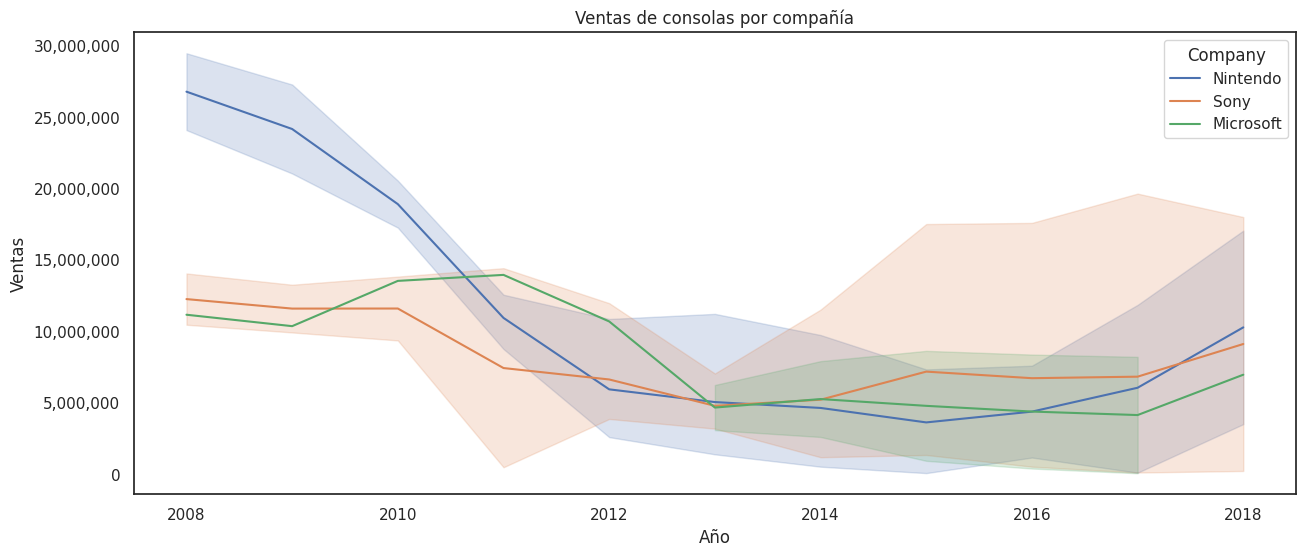

In [ ]:
df_sales_consoles = df_consoles[df_consoles['Dato'] != 'Out_of_use']

plt.figure(figsize=(15,6))

sns.set_theme(style="white")
sns.lineplot(data=df_sales_consoles, x='Year', y='Sales', hue='Company')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas de consolas por compañía')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

Como se puede apreciar, Nintendo lideró el mercado de las consolas de manera destacada entre los años 2008 y 2010. Sin embargo, el lanzamiento de la Nintendo Wii U en 2012 no tuvo un impacto significativo en los ingresos de la compañía y se niveló con el resto de sus competidores.

Por otro lado, en el año 2013, se lanzaron la PS4 y la Xbox One, marcando una nueva generación de videojuegos. Ambas consolas mostraron un cambio en la tendencia a la baja que ambas empresas habían experimentado. En el caso de Sony, el PS4 logró un cambio hacia una tendencia alcista, posicionándose como la empresa con mayores ingresos en el mercado durante los años 2014 y 2016.

En los años 2017 y 2018, se observa una tendencia alcista más pronunciada en las tres compañías. Además, Nintendo vuelve a liderar el mercado después del lanzamiento de la Nintendo Switch en 2017.

Si analizamos únicamente las consolas que están actualmente en el mercado, podemos obtener la siguiente información:

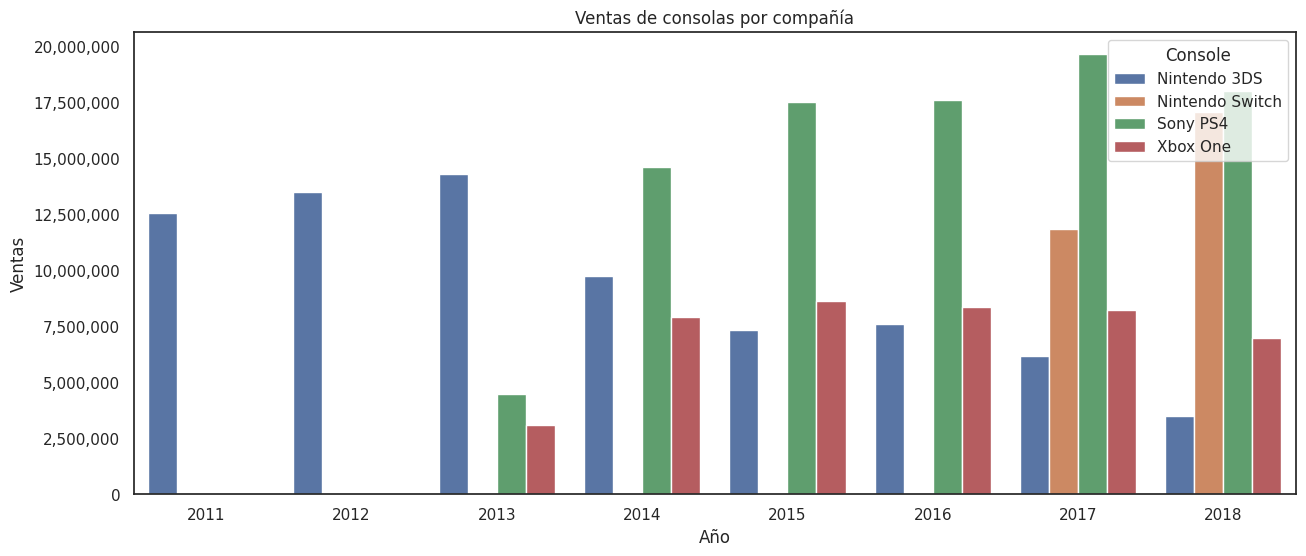

<IPython.core.display.Javascript object>

In [ ]:
df_consoles_out_of_use = df_consoles[df_consoles['Dato'] == 'Out_of_use']

consoles_out_of_use = df_consoles_out_of_use.groupby('Console')['Console'].count()
df_consoles_on_use = df_consoles[~df_consoles['Console'].isin(list(consoles_out_of_use.index))]

plt.figure(figsize=(15,6))
sns.set_theme(style="white")
sns.barplot(data=df_consoles_on_use, x='Year', y='Sales', hue='Console')

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas de consolas por compañía')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

En el gráfico, se puede apreciar parte de la decadencia de Nintendo. Por un lado, el producto Wii U tuvo una corta duración en el mercado y ya no está disponible para la venta, mientras que la consola portátil Nintendo 3DS, lanzada en 2011, aún sigue en el mercado.

Además de esto, se pueden visualizar dos hechos imporantes en el mercado:

- En primer lugar, se observa en los datos de la PS4 una tendencia pronunciada de ventas desde su lanzamiento en 2013, superando ampliamente al resto de sus competidores, especialmente a la Xbox One, consola que también fue lanzada ese mismo año.

- En segundo lugar, a pesar de la decadencia que Nintendo experimentó a partir de 2011 en términos de número de ventas, el lanzamiento de la Nintendo Switch generó ingresos significativamente altos durante su primer año en comparación con la PS4 y la Xbox One. Además, en tan solo dos años en el mercado, la Nintendo Switch logró posicionarse a la par con la PS4 en términos de ventas. Estos resultados sugieren que Nintendo podría recuperar su posición de liderazgo en el mercado de consolas en los años siguientes, teniendo en cuenta su historial previo.

En conclusión, la PS4 y la Nintendo Switch son sin duda las opciones destacadas en el mercado de consolas, y la elección entre ellas dependerá de las características específicas del videojuego, como si está enfocado en dispositivos portátiles o de sobremesa, o el público al que se dirige. Por otro lado, la Xbox One no sería considerada debido a sugiere que la cantidad de usuarios que posee es inferior.

### **¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?**

Podemos realizar una comparativa de las proporciones entre la poblacion de una determinada región contra el ingreso per cápita(PIB), y analizar cómo se relacionan los ingresos por videojuegos en función de esta proporción. En un territorio donde la población sea relativamente baja pero con un PIB alto, se esperaría un mayor consumo de videojuegos en comparación con una región donde la población sea alta pero el PIB sea bajo.

En las distribuciones que se muestran a continuación, podemos analizar lo que se propone:

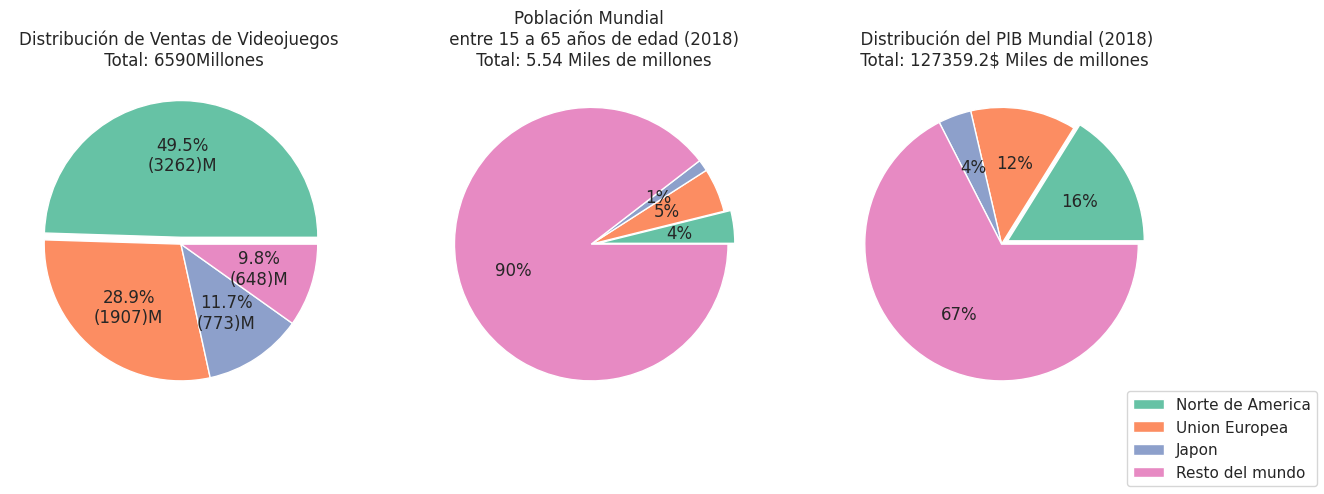

In [ ]:
explode = [0.05, 0, 0, 0]
palette_color = sns.color_palette("Set2")

fig, ax = plt.subplots(1, 3,  figsize=(15, 5))

sales_by_loc = df_sales.loc[:,"NA_Sales":"Other_Sales"].sum()
population_2018 = df_HDI[df_HDI['Series Code'] == "SP.POP.1564.TO"]['2018'].values
PIB_2018 = df_HDI[df_HDI['Series Code'] == "NY.GDP.MKTP.CD"]['2018'].values

total_sales_by_loc = str(round(sum(sales_by_loc)))
total_population_2018 =  str(round(sum(population_2018) / 1000000000, 2 )) + ' Miles de millones'
total_PIB_2018 = str(round(sum(PIB_2018) / 1000000000, 2)) + '$ Miles de millones'

labels = ['Norte de America', 'Union Europea', 'Japon', 'Resto del mundo']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})M"

ax[0].set_title('Distribución de Ventas de Videojuegos \n Total: ' + str(round(sum(sales_by_loc))) + 'Millones')
ax[0].pie(sales_by_loc, autopct=lambda pct: func(pct, sales_by_loc), explode=[0.05, 0, 0, 0], colors=palette_color)

ax[1].set_title('Población Mundial \n entre 15 a 65 años de edad (2018)\n Total: ' + total_population_2018)
ax[1].pie( population_2018, explode=[0.05, 0, 0, 0], colors=palette_color, autopct='%.0f%%')

ax[2].set_title('  Distribución del PIB Mundial (2018)\n Total: ' + total_PIB_2018)
ax[2].pie(PIB_2018, explode=[0.05, 0, 0, 0], colors=palette_color, autopct='%.0f%%')

fig.legend(labels, loc='lower right')
plt.show()

En la primera distribución, América del Norte, específicamente Estados Unidos, representa el mayor número de ventas en el mercado de videojuegos, con casi el 50% de las ventas totales. Sin embargo, a pesar del número tan alto de ventas, en Estados Unidos apenas se concentra el 4% de la población mundial comprendida entre 15 y 65 años de edad, tal como se puede ver en la distribución número 2, y también tiene un PIB muy alto en proporción a su población.

En contraste, el resto del mundo representa el 90% de la población mundial en el rango de edad de 15 a 65 años, pero tiene el porcentaje más pequeño de ventas, con 648 millones de dólares, cifra incluso por debajo de Japón, que tiene sólo el 1% de la población mundial.

De esto se puede considerar que, efectivamente, en los países donde el PIB es mayor en proporción al porcentaje de población, el número de ingresos en el mercado de videojuegos será mayor. En el resto del mundo se encuentran países de Asia, América Latina, África y Oceanía, donde hay una presencia significativa de países en vías de desarrollo o con problemas socioeconómicos, lo cual podría explicar parte del número de ventas tan bajo de videojuegos.

### **¿En qué regiones conviene enfocarse?**

De acuerdo a los datos presentados en los gráficos anteriores, Estados Unidos lidera en cuanto al total de ingresos generados por las ventas de videojuegos a nivel mundial. Representa aproximadamente el 49% de las ventas, lo que equivale a un total de 3262 millones de dólares, considerando los videojuegos lanzados en los últimos veinte años y que aún se encuentran vigentes en el mercado.

En segundo lugar se encuentra Japón. Aunque el gráfico registra el 11.7% de las ventas totales y es un porcentaje considerablemente menor que el 28.9% de la Unión Europea, es importante tener en cuenta que Japón es un solo país en comparación con los 27 países miembros de la Unión Europea. Además, teniendo esto en cuanta, Japón representa aproximadamente el 4% del PIB mundial, lo cual es casi comparable al 5% de la Unión Europea, por lo que se puede concluir que la población en japón tiene un poder adquisitivo mayor en comparación con la población de la Unión Europea.

Además, Japón también es la Sede De Nintendo y Sony, ambas empresas líderes acualmente en el mercado de consolas de videojuegos.

En tercer lugar se encuentran los países de la Unión Europea, que consta de un total de 27 países miembros. Aquí se concentra el 28.9% de las ventas totales.

Por último, el resto del mundo, que a pesar de tener una concentración del 90% de la población global entre 15 a 65 años, registra el menor número de ventas a nivel mundial. Se considera que el consumo de videojuegos no es una necesidad básica, por lo que en países donde el poder adquisitivo sea es relativamente bajo, los ingresos por ventas de videojuegos se ven afectados considerablemente. Esto podría ser el caso en gran parte de los países de Latinoamérica, África, Asia y Oceanía, pero se requiere de más información demográfica sobre estas regiones para poder realizar una evaluación más precisa.

### **¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?**

Si se desea obtener más información según otras características demográficas, es importante tener en cuenta que los datos que se proporcionaron en el conjunto de datos del Índice de Desarrollo Humano son limitados en términos de los indicadores disponibles y las regiones cubiertas. Además, es importante destacar que faltan los datos más recientes correspondientes al año 2019.

En cuanto a los rangos de edad, se podría determinar hacia qué grupos etarios sería más conveniente enfocar el contenido y determinar en qué regiones se encuentra el porcentaje más alto de usuarios dentro de los rangos de edad más propensos a jugar videojuegos. Sin embargo, el conjunto de datos solo proporciona información para los siguientes rangos de edad:

- 0 a 15 años.
- 15 a 65 años.
- 65 años o más.

Estos rangos son bastante amplios para realizar un análisis profundo, especialmente el rango de 15 a 65 años. No obstante, con los datos disponibles, surge la pregunta de si, al considerar el lanzamiento de nuevos productos, resulta conveniente limitar el contenido para dirigirlo hacia un público de niños o adolescentes (menores de 17 años), o si esto no es relevante y sería más favorable incluir contenido destinado a mayores de 17 años o adultos, según la clasificación establecida por la ESRB.

Para determinar esto, gracias a que se disponen de los datos de lanzamientos de videojuegos desde 1980 hasta la actualidad, junto con su clasificación por edad, se puede organizar la información según las clasificaciones de contenido correspondientes.

In [ ]:
# Los datos se filtraron desde de 2000 hasta la actualidad.
# Solo se incluyeron videojuegos que disponían de clasificación por edad.

df_ratings = df_sales[~df_sales['Rating'].isna()].copy()
df_ratings.groupby('Rating', as_index=False)['Rating'].agg(['count']).sort_values('count',ascending=False)

,count
Rating,
RP,4609
E,3799
T,2807
M,1508
E10+,1392
EC,8
AO,1


De acuerdo a la tabla anterior, las clasificaciones E, T, M y E10+ son las que abarcan la mayoría de los juegos en el mercado desde 2000. No se dispone de registros para las clasificaciones A0, EC, K-A, por lo que no es posible trabajar con ellos en este análisis, y la clasificación RP es para videojuegos sin clasificación

Para comprender más sobre cada clasificación de la ESRB, se pueden considerar las siguientes definiciones:

- E: Apto para todo público.
- T: Apto para adolescentes, mayores de 13 años.
- M: Restringido para mayores de 17 años.
- E10+: Apto para todo público mayor de 10 años.
- A0: Solo para adultos mayores de 18 años.
- EC: Destinado a niños pequeños o en edad temprana.
- K-A: Era el nombre que recibía la clasificación "Everyone" desde 1994 hasta 1998.
- RP: Rating Pending (Calificación Pendiente); se utiliza cuando aún no se ha asignado una clasificación definitiva al juego.

Teniendo en cuenta esta información, se puede visualizar la evolución del número de títulos lanzados por año y de los ingresos obtenidos en los gráficos siguientes:


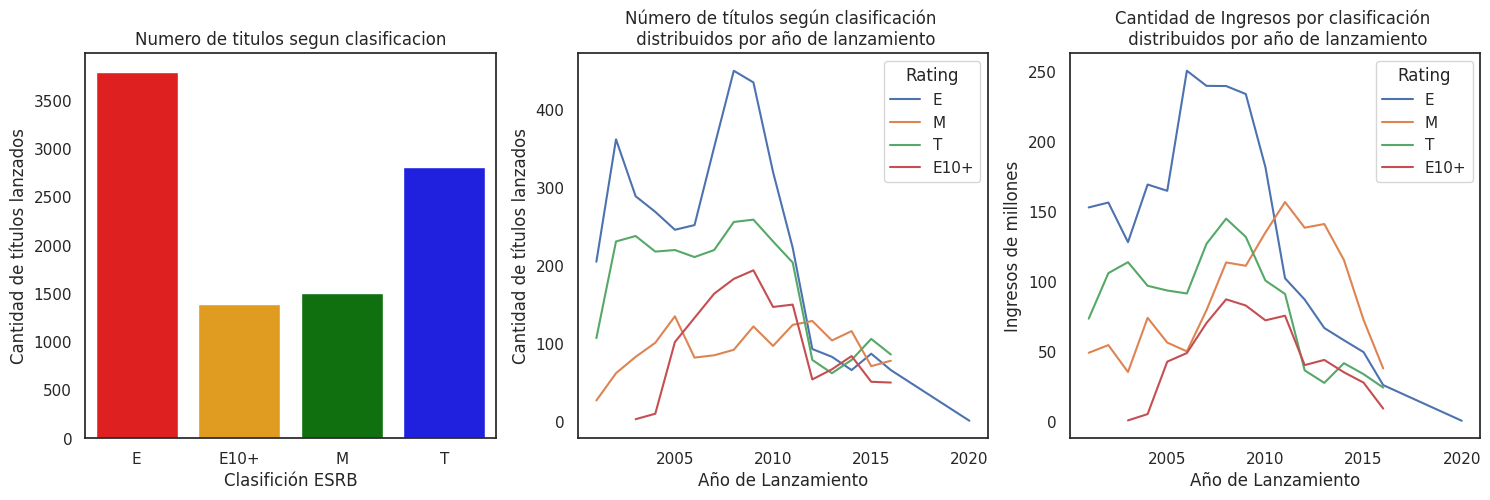

<IPython.core.display.Javascript object>

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
ratings = ['E', 'E10+', 'M', 'T']
df_ratings = df_ratings[df_ratings.Rating.isin(ratings)]
test = df_ratings.groupby('Rating')['Rating'].agg(['count']).reset_index()

sns.barplot(ax=axes[0], data=test, x='Rating', y='count', palette=['red', 'orange', 'green', 'blue'])
axes[0].set(ylabel='Cantidad de títulos lanzados', xlabel='Clasifición ESRB')
axes[0].set_title('Numero de titulos segun clasificacion')

test = df_ratings.groupby(['Year_of_Release','Rating'])['Year_of_Release'].agg(['count']).reset_index()
axes[1].set_title('Número de títulos según clasificación \n distribuidos por año de lanzamiento')
axes[1].set(ylabel='Cantidad de títulos lanzados', xlabel='Año de Lanzamiento')
sns.lineplot(ax=axes[1], data=test, x='Year_of_Release', y='count', hue='Rating' )

test = df_ratings.groupby(['Year_of_Release','Rating'])['Global_Sales'].agg(['sum']).reset_index()
axes[2].set(ylabel='Ingresos de millones', xlabel='Año de Lanzamiento')
axes[2].set_title('Cantidad de Ingresos por clasificación \n distribuidos por año de lanzamiento')
sns.lineplot(ax=axes[2], data=test, x='Year_of_Release', y='sum', hue='Rating')

plt.show()

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

El gráfico muestra que entre los años 2000 y 2010, el mercado de videojuegos estaba dominado por títulos destinados a todo tipo de público y destinados a adolescentes mayores de 13 años. Esto indica que durante esa década, los juegos con mas ingresos maximo presentaban elementos como sangre moderada, humor cruel, temas sugerentes o violencia, de acuerdo a lo expresa la ESRB para estas clasificaciones.

Sin embargo, tras el desfavorable lanzamiento de la Nintendo Wii U a finales del 2012, un año antes de la salía al mercado la PlayStation 4 y la Xbox One en el 2013, los ingresos generados por los videojuegos destinados a todo público disminuyeron considerablemente. Además, en términos de cantidad de ingresos, los juegos con clasificación "M" comenzaron a liderar el mercado. Lo más relevante de esto, es que, aunque el número de títulos de videojuegos con clasificación "M" se ha mantenido constante año tras año desde 2005, los ingresos generados por esta categoría han tenido una tendencia alcista aumentado continuamente desde el año 2000. Esto indica que la proporción entre el número de títulos y los ingresos generados es mayor para los videojuegos con clasificación "M" en comparación con los de clasificación "E".

Es importante destacar que faltan datos más recientes para un análisis completo. Sin embargo, a partir de las gráficas, se puede concluir que hasta el 2015, el número de videojuegos clasificados como "M" había estado en constante aumento hasta lograr posicionars como la categoría que mas ingresos genera en el 2009.

Estos videojuegos incluyen elementos como violencia intensa o realista, sangre fuerte, temas de horror, contenido sexual, insultos vulgares, uso de tabaco y alcohol, y están restringidos a usuarios mayores de 17 años. Por lo tanto, se puede suponer que el tipo de contenido mostrado en los videojuegos no ha repercutido en una disminución de los ingresos. De este modo, al considerar el lanzamiento de futuros videojuegos, sería conveniente enfocarse en un público adulto y en países o regiones donde este tipo de contenido no se considere inapropiado o un tabú debido a factores culturales, políticos o religiosos.

### **¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.**

Sí es posible estimar las ventas de los juegos actuales según su categoría. Gracias a la información proporcionada sobre las ventas globales de los videojuegos y su género, se puede filtrar los juegos según esta variable y determinar cuáles son los géneros más populares o aquellos que estaán generando mayores ingresos.

En el siguiente gráfico de barras se pueden observar los géneros que han generado mayores ingresos desde el año 2010, independientemente de la plataforma.

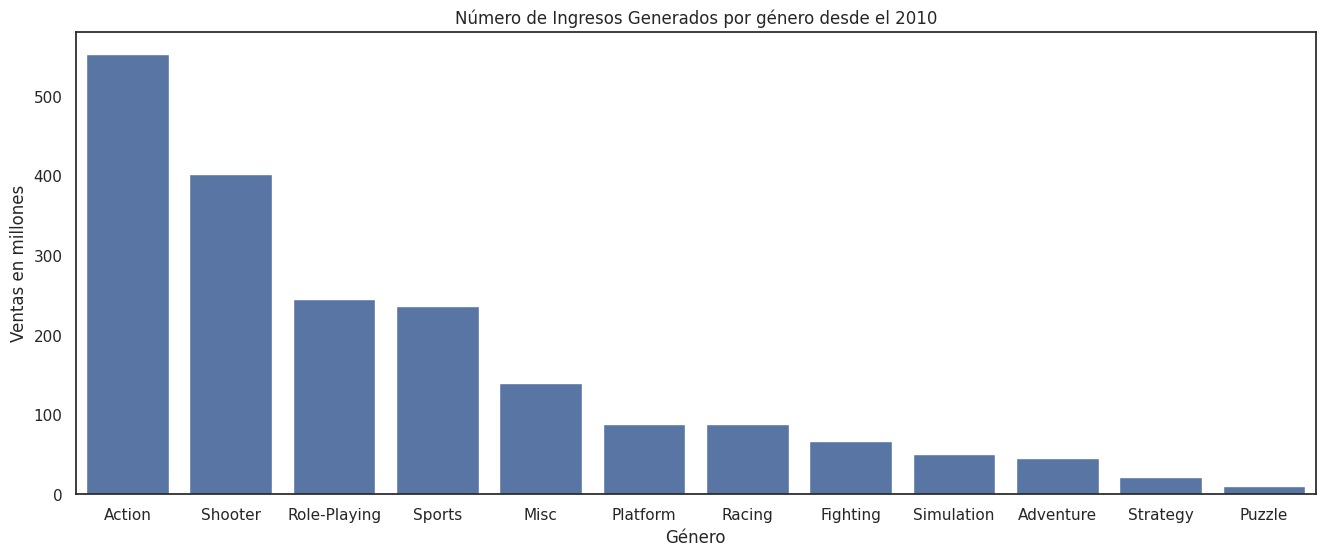

In [ ]:
sales = df_sales.groupby('Genre')['Global_Sales'].sum()

f, ax = plt.subplots(figsize=(16, 6))

sns.set_color_codes("pastel")
sns.set_theme(style="whitegrid")

test = df_sales[df_sales.Year_of_Release > 2010].groupby(['Genre'])['Global_Sales'].agg('sum').reset_index().sort_values(by='Global_Sales', ascending=False)
sns.barplot(y="Global_Sales", x="Genre", data=test, color="b")

plt.xlabel('Género')
plt.ylabel('Ventas en millones')
plt.title('Número de Ingresos Generados por género desde el 2010')

ax = plt.gca()
plt.show()

En el gráfico se aprecia que los videojuegos de los géneros Action y Shooter son los que han generado mayores ingresos desde 2010.

Es importante destacar que los géneros Shooter y Action están estrechamente relacionados, ya que los videojuegos del tipo shooter suelen clasificarse como videojuegos de acción. De esta manera, se puede concluir que el género que se destaca en el mercado en cuanto a la generación de ingresos es el género de "acción", y dentro de este género, la subcategoría "shooter" es la que predomina.

Los datos son independientes de la plataforma y corresponden a los títulos lanzados desde 2010 hasta la fecha actual. A continuación, se muestran los mismos datos pero filtrados por las plataformas PS4, Xbox One y PC. Se consideron únicamente estas plataformas debido a que son las más utilizadas en la última década y las que aún se encuentran vigentes en el mercado. No se considera la Nintendo Switch debido a la falta de datos de videojuegos para esta plataforma.

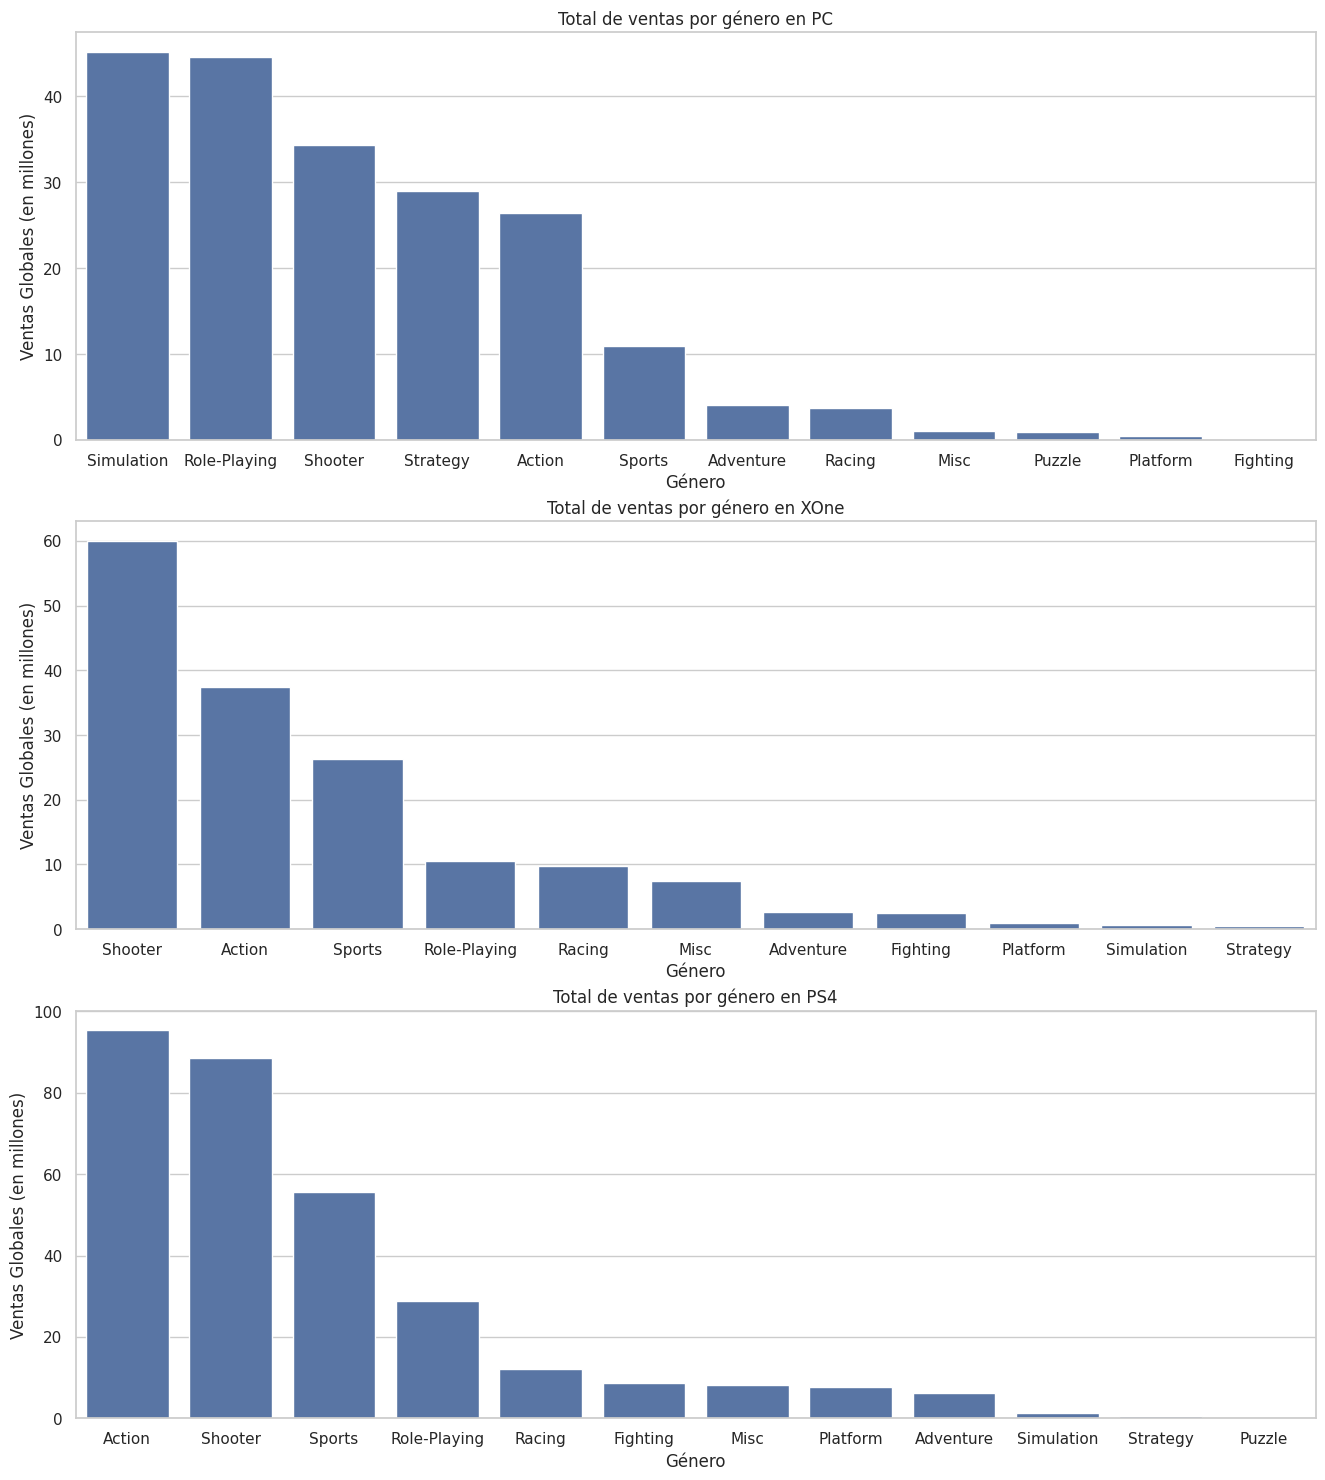

<IPython.core.display.Javascript object>

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

for index, plat  in enumerate(['PC', 'XOne', 'PS4']):
  test = df_sales[df_sales.Platform == plat].groupby(['Genre'])['Global_Sales'].agg('sum').reset_index().sort_values(by='Global_Sales', ascending=False)
  axes[index].set_title('Total de ventas por género en ' + plat)
  axes[index].set(ylabel='Ventas globales, en millones', xlabel='Género')
  sns.barplot(ax=axes[index], y="Global_Sales", x="Genre", data=test, color="b")
  axes[index].set(xlabel='Género', ylabel='Ventas Globales (en millones)')

plt.show()
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

En los tres gráficos anteriores se puede apreciar el volumen de ventas por género en relación a las plataformas vigentes en el mercado: PC, PS4 y Xbox One.

Entre las tres plataformas, las que registran más ventas son la PS4 y Xbox One, las consolas de sobremesa. Y, en común, las tres plataformas posicionan a los videojuegos de Shooter y Action en las tres primeras posiciones del gráfico. En este sentido, se estimar que los videojuegos de acción y shooter tienen una alta probabilidad de recibir una gran aceptación en el mercado actual, independientemente de la plataforma en la que se publiquen. Esto no ocurre con los videojuegos del género Sports, que aunque registran buenos ingresos globales en las consolas de sobremesa (ocupando la tercera posición), en PC se sitúan en la sexta posición.

Por otro lado, considerando la conclusión obtenida anteriormente en relación a los rangos de etarios y el contenido de los videojuegos, si
se verica la clasificación por edad (rating) de los videojuegos de acción y shooter de los últimos 10 años, se obtiene lo siguiente:


In [ ]:
df_ratings = df_sales[
  (df_sales.Genre.isin(['Shooter', 'Action']))
  &
  (df_sales.Year_of_Release > 2010)].groupby('Rating')['Rating'].count()
df_ratings

Rating
E        91
E10+    213
EC        1
M       467
RP      592
T       235
Name: Rating, dtype: int64

Nuevamente, la clasificación "M" es la más común en este tipo de videojuegos, lo que reafirma la idea de que el contenido mostrado en esta clasificación de juegos está comenzando a liderar en el mercado.

En resumen, gracias a esta información y al análisis realizado, tomando como referencia todos los títulos lanzados desde 2010 hasta la actualidad, se puede concluir que los videojuegos de acción y shooter son el género que predomina en el mercado y que generan mayores ingresos, y el contenido que estos muestran es el mas popular actualmente.


## **Conclusiones**

A lo largo del análisis, se pudieron observar patrones que indican varios aspectos importantes. En resumen, se llegaron a las siguientes conclusiones:

- En el mercado de videojuegos, se observó un cambio significativo a partir de la década de 2010. El número de juegos con clasificación "M" comenzó a liderar en términos de ingresos generados sobre la clasificacion "E" o "T", a pesar de que esta clasificación "M" había mantenido un número constante de nuevos títulos por año desde 2005. En este sentido, resulta más conveniente no limitar el contenido de nuevos productos y enfocarse a un público adulto.

- En el mercado de consolas, Nintendo fue la compañía líder en ingresos y volumen de ventas durante los años 2003 y 2009, marcando una clara tendencia al alza. Sin embargo, con la llegada de la PlayStation 4 de Sony y la Xbox One de Microsoft en 2013, esta tendencia cambió y se niveló con el resto de sus competidores.

- Desde su lanzamiento en 2013, la PlayStation 4 de Sony ha experimentado un crecimiento constante, superando ampliamente a sus competidores y convirtiéndose en la consola más popular del mercado. Por lo tanto, se considera la plataforma ideal para alcanzar a la mayor cantidad de usuarios con nuevos productos.

- Aunque la PC cuenta con su propia plataforma de venta de videojuegos en línea, Steam, los títulos de PC no tienen una gran participación en términos de ventas globales según los datos del conjunto de datos analizado.

- A nivel demográfico, los países desarrollados con un alto PIB tienen un mayor número de ingresos por ventas de videojuegos. Esto es especialmente relevante en Estados Unidos y Japón, lo cual debe ser considerado al lanzar nuevos productos.

- Los videojuegos de acción/shooter son los que registran mayores ingresos en el mercado actual, independientemente de la plataforma.


## **Autor del Análisis**

---

### **Contacto**:

---